In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from keras.utils import np_utils

from nn.neural_network import NeuralNetwork
from nn.layers import Input, Dense

In [2]:
X, y = load_iris(return_X_y=True)
X = pd.DataFrame(X)
X['_class'] = y
X

,0,1,2,3,_class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   _class  150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [4]:
X[[i for i in range(4)]].describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
np.random.seed(10)
trainset, testset = train_test_split(X, test_size=0.3)

X_train = trainset[[i for i in range(4)]]
y_train = trainset._class.to_numpy()

X_test = testset[[i for i in range(4)]]
y_test = testset._class.to_numpy()

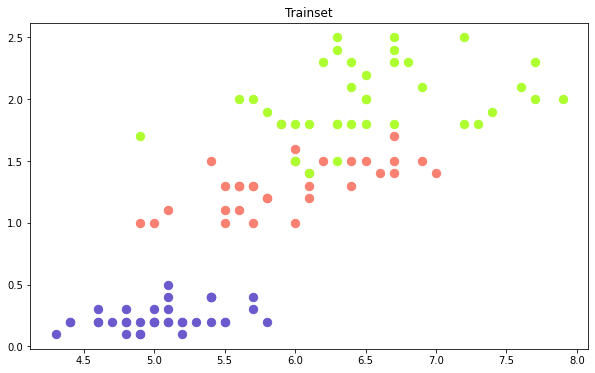

In [6]:
# Trainset visualization
plt.figure(figsize=(10, 6))
plt.title('Trainset')
size = 70
plt.scatter(trainset[trainset._class == 0][0], trainset[trainset._class == 0][3], c='slateblue',s=size)
plt.scatter(trainset[trainset._class == 1][0], trainset[trainset._class == 1][3], c='salmon', s=size)
plt.scatter(trainset[trainset._class == 2][0], trainset[trainset._class == 2][3], c='greenyellow', s=size)
plt.show()

In [7]:
# preprocessing
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_test = y_test.reshape(y_test.shape[0], 3, 1)
y_train = y_train.reshape(y_train.shape[0], 3, 1)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

X_test = X_test.reshape(X_test.shape[0], 4, 1)
X_train = X_train.reshape(X_train.shape[0], 4, 1)

In [8]:
# build the neural network
model = NeuralNetwork(loss_f='MSE')

model.add_layer(Input(input_shape=X_train.shape[1:]))
model.add_layer(Dense(n_neur=8, act_f='sigmoid'))
model.add_layer(Dense(n_neur=3, act_f='sigmoid'))

# show the summary of the neural network
model.summary()

,Type,Activation Function,Input Shape,Output Shape
0,Input,None,None,"(4, 1)"
1,Dense,Sigmoid,"(4, 1)","(8, 1)"
2,Dense,Sigmoid,"(8, 1)","(3, 1)"


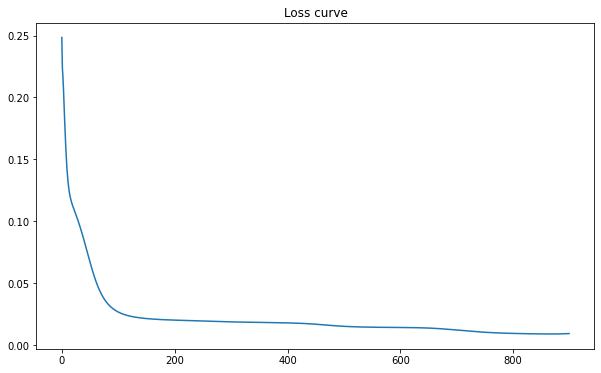

In [9]:
# training
loss = model.fit(X_train, y_train, epochs=900, lr=0.02)

# plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(list(range(len(loss))), loss)
plt.title('Loss curve')
plt.show()

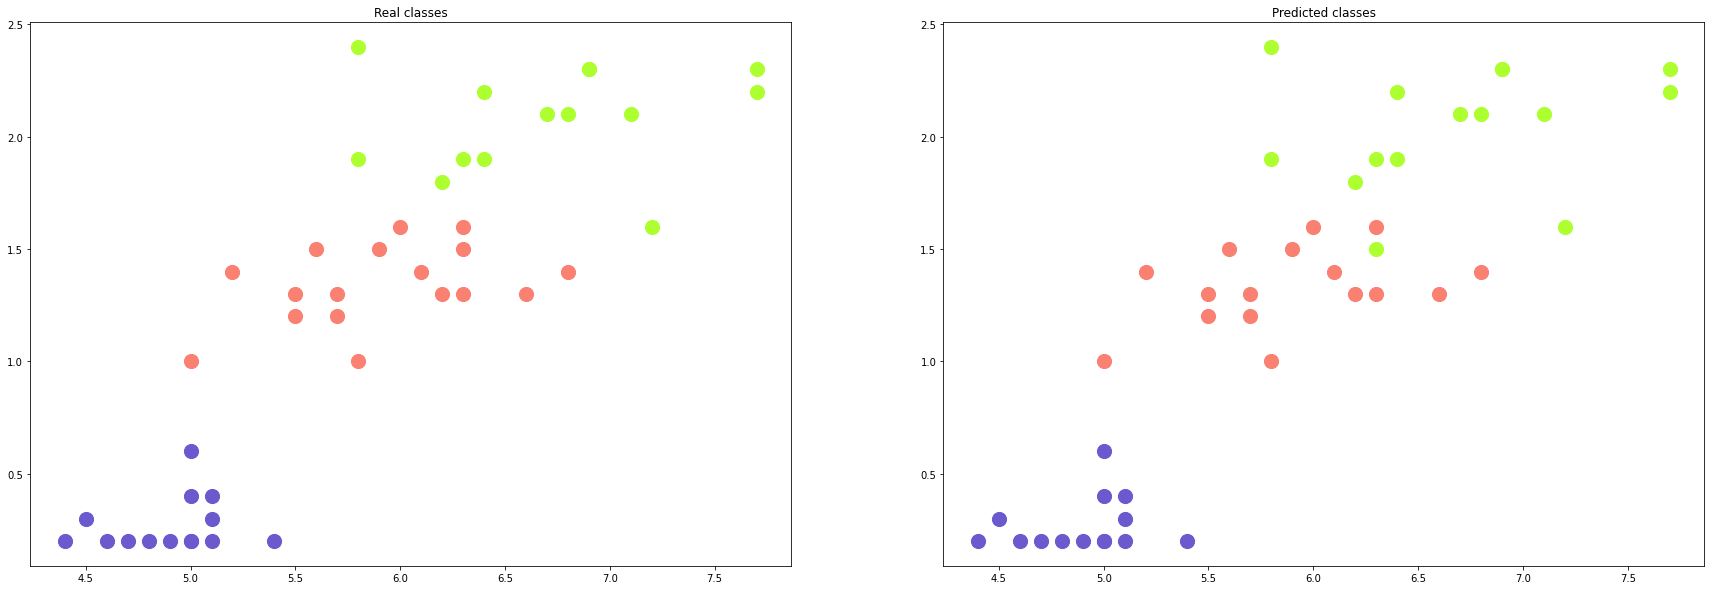

In [10]:
# prediction
yp = model.predict(X_test)

df_test = pd.DataFrame(X_test.reshape(X_test.shape[0], X_test.shape[1]))
df_test['_class'] = [np.argmax(x) for x in y_test]

df_pred = df_test.copy()
df_pred['_class'] = [np.argmax(x) for x in yp]

figures = [df_test, df_pred]

# visualise predicted and real classes
fig, axes = plt.subplots(1,2, figsize=(30,10))
for i,ax in enumerate(axes.flat):
    # Visualización de la nube de datos.
    size = 200
    ax.scatter(figures[i][figures[i]._class == 0][0], figures[i][figures[i]._class == 0][3], c='slateblue',s=size)
    ax.scatter(figures[i][figures[i]._class == 1][0], figures[i][figures[i]._class == 1][3], c='salmon', s=size)
    ax.scatter(figures[i][figures[i]._class == 2][0], figures[i][figures[i]._class == 2][3], c='greenyellow', s=size)
    ax.title.set_text(f"{'Real' if i == 0 else'Predicted'} classes")